<a href="https://colab.research.google.com/github/Aparnakhaleanwar/Capstone1_EDA/blob/main/CapStone1_27092022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Data from Hotel Booking.csv file from Google Drive has been assigned to data frame named df_hotel. 
df=pd.read_csv("//content//drive//MyDrive//AlmaBetter//Hotel Bookings.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv("/content/Hotel_Bookings_2.csv")

print(df.to_string()) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#verify data types of all columns
df.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

***Agent wise bookings Analysis***

In [ ]:
#for Agent Analysis, replaced NaN values by 0 to perform further investigation.
df['agent'] = df['agent'].fillna(0)
df['agent']=df['agent'].astype(int)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

     Agent  Agent_wise_bookings
251    535                    3
102    531                   68
141    527                   35
210    526                   10
270    510                    2
211    509                   10
231    508                    6
168    502                   24
310    497                    1
108    495                   57


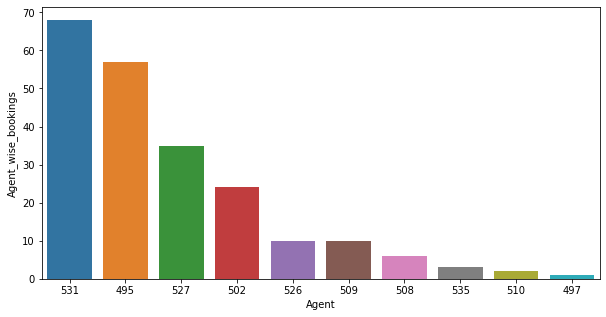

In [ ]:
#Remove company data where company is not associated with hotel
df.drop(df[(df['agent'] == 0)].index, inplace=True)
#Find count of each agent to predict which agent has given maximum business which can be considered while providing commission to agent.
df_Agent = df['agent'].value_counts().reset_index().rename(columns = {'index':'Agent','agent':'Agent_wise_bookings'}).sort_values(by = 'Agent_wise_bookings', ascending = False)
df_Agent = df_Agent.nlargest(10, ['Agent']) # Find top 5 agents providing maximum business.
plt.figure(figsize = (10,5))
print (df_Agent)
sns.barplot(x = 'Agent', y = 'Agent_wise_bookings', data = df_Agent, order = df_Agent.sort_values('Agent_wise_bookings', ascending = False).Agent)

***Company wise bookings Analysis***

In [ ]:
#Company Analysis
df['company'] = df['company'].fillna(0)
df['company']=df['company'].astype(int)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:

#Find Unique companies

df['company'].unique()

array([  0, 113, 281, 324, 405, 223, 250,  61, 268, 331, 146, 399,  99,
       360, 419, 439, 442, 184, 485, 499,  29, 126, 242, 436,  40,   9,
        84,  14,  45,  85, 148, 186, 273, 301, 313, 312, 333, 361, 379,
       132, 395, 412, 417, 444, 478, 229, 421])

In [ ]:
#Remove company data where company is not associated with hotel
df.drop(df[(df['company'] == 0)].index, inplace=True)
#Find company wise hotel count. so if we considered it's a chain of hotel associated with any company then this data will 
#show which company hotels are preferable.
df['company'].value_counts()
#Find count of each company to predict which company is getting maximum business.
df_Company = df['company'].value_counts().reset_index().rename(columns = {'index':'Company','company':'Company_Owned_Hotels'}).sort_values(by = 'Company_Owned_Hotels', ascending = False)
df_Company = df_Company.nlargest(10, ['Company_Owned_Hotels']) # Find top 5 agents providing maximum business.
plt.figure(figsize = (10,5))
print (df_Company)
#sns.barplot(x = 'Company', y = 'Company_Owned_Hotels', data = df_Company, order = df_Company.sort_values('Company_Owned_Hotels', ascending = False).Company)

    Company  Company_Owned_Hotels
0       281                   120
1         9                    11
2       333                     9
3       324                     9
4       148                     7
5       405                     5
6       399                     4
7        99                     4
9       268                     3
10      146                     3


<Figure size 720x360 with 0 Axes>

**Market Segment -Booking Analysis**


   MarketSegment  MarketSegment_Wise_Count
0      Corporate                       131
1      Online TA                        44
2         Direct                        21
3  Offline TA/TO                        18
4  Complementary                         2
5         Groups                         1


<Figure size 720x360 with 0 Axes>

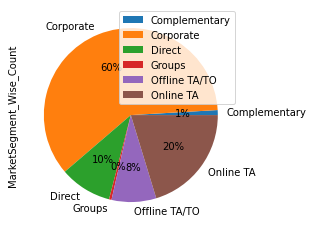

In [ ]:
#Find count of each market segment to predict which segment is popular.
df_Market_Segment = df['market_segment'].value_counts().reset_index().rename(columns = {'index':'MarketSegment','market_segment':'MarketSegment_Wise_Count'}).sort_values(by = 'MarketSegment_Wise_Count', ascending = False)
plt.figure(figsize = (10,5))
print (df_Market_Segment)
#sns.barplot(x = 'MarketSegment', y = 'MarketSegment_Wise_Count', data = df_Market_Segment, order = df_Market_Segment.sort_values('MarketSegment_Wise_Count', ascending = False).MarketSegment)
df_Market_Segment.groupby(['MarketSegment']).sum().plot(kind='pie',y='MarketSegment_Wise_Count',autopct='%1.0f%%')

***Distributor channel analysis***

Q1)What is booking % against each distribution channel.

  DistributionChannel  Distribution_Channel_Wise_Count
0           Corporate                              132
1               TA/TO                               64
2              Direct                               20
3                 GDS                                1


<Figure size 720x360 with 0 Axes>

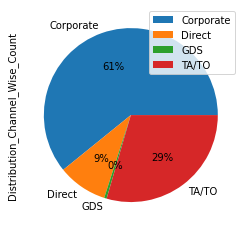

In [ ]:
#Find count of each distribution channel to predict which distribution channel is used by maximum customer for hotel booking .
df_Distribution_Channel = df['distribution_channel'].value_counts().reset_index().rename(columns = {'index':'DistributionChannel','distribution_channel':'Distribution_Channel_Wise_Count'}).sort_values(by = 'Distribution_Channel_Wise_Count', ascending = False)
plt.figure(figsize = (10,5))
print (df_Distribution_Channel)
df_Distribution_Channel.groupby(['DistributionChannel']).sum().plot(kind='pie',y='Distribution_Channel_Wise_Count',autopct='%1.0f%%')

Q2)Which distribution channel is giving more business to hotels on basis of hotel type?

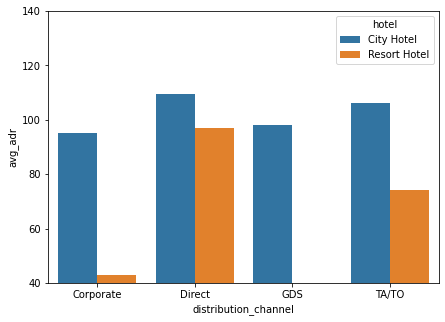

In [ ]:
dc_hotel = df.groupby(['distribution_channel', 'hotel'])
df_dc_hotel = pd.DataFrame(round((dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = df_dc_hotel['distribution_channel'], y = df_dc_hotel['avg_adr'], hue = df_dc_hotel['hotel'])
plt.ylim(40,140)
plt.show()

***deposit vs cancellation***

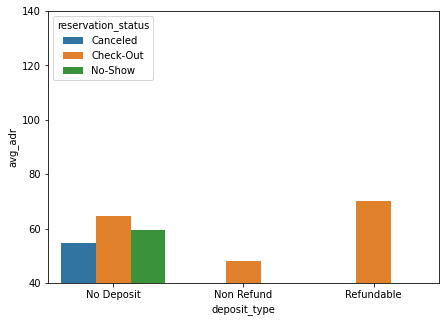

In [ ]:
dt_rs = df.groupby(['deposit_type', 'reservation_status'])
df_dt_rs = pd.DataFrame(round((dt_rs['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = df_dt_rs['deposit_type'], y = df_dt_rs['avg_adr'], hue = df_dt_rs['reservation_status'])
plt.ylim(40,140)
plt.show()

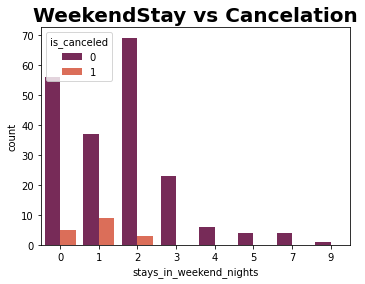

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

***Cancellation reasons on basis of days_in_waiting_list/required_car_parking_spaces/total_of_special_requests***

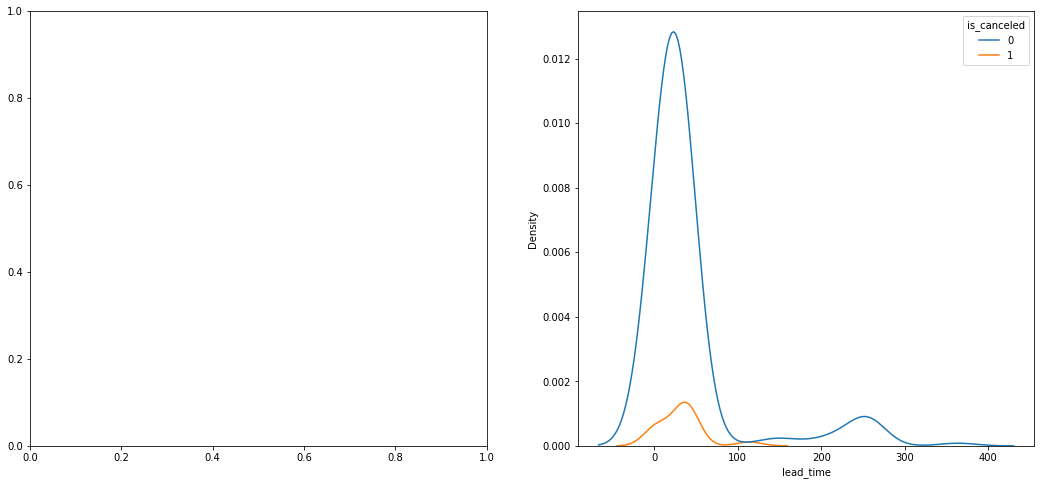

In [ ]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax=axes[1],x = df['lead_time'], hue = df['is_canceled'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


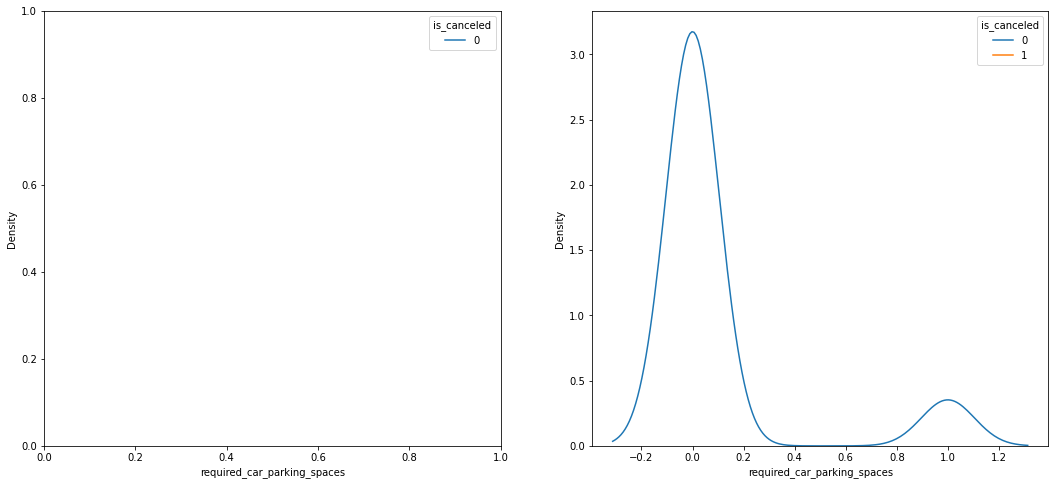

In [ ]:
Req_CarParking = df[df['required_car_parking_spaces'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'required_car_parking_spaces', hue = 'is_canceled' , data = Req_CarParking)
sns.kdeplot(ax=axes[1],x = df['required_car_parking_spaces'], hue = df['is_canceled'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


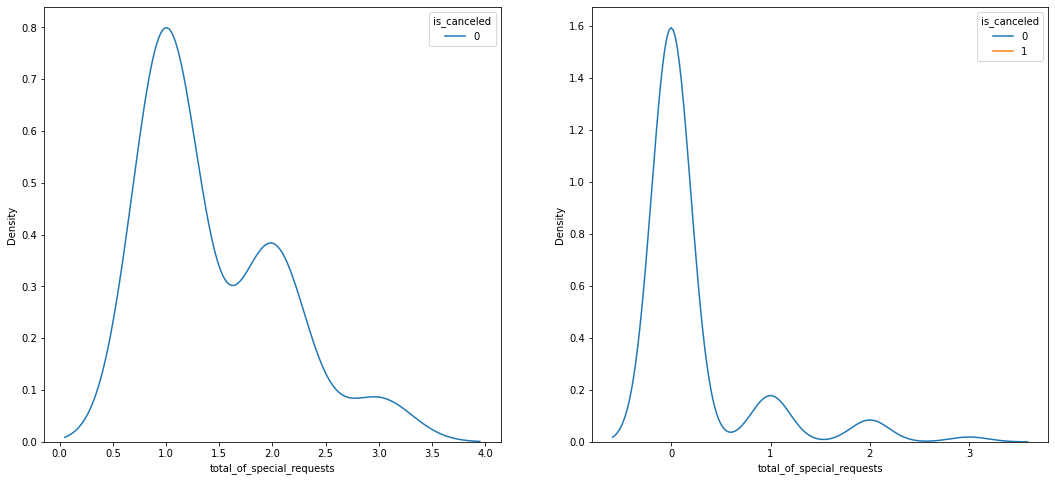

In [ ]:
SpecialRequests = df[df['total_of_special_requests'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'total_of_special_requests', hue = 'is_canceled' , data = SpecialRequests)
sns.kdeplot(ax=axes[1],x = df['total_of_special_requests'], hue = df['is_canceled'])
plt.show()

***ADR***
Q1. adr min room sold maximum and vicevarsa
Q2. adr relation cancellation
Q3. relation profiit
Q4.hotel higher booking cancellation rate another question

average daily rate per person =  ADR/Adults+Children

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

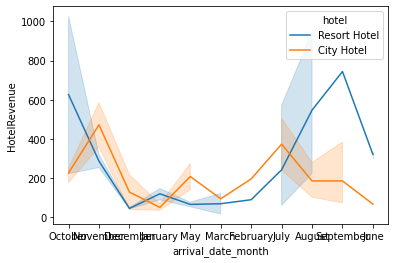

In [ ]:
ADR_For_NonCanceledBooking = df[df['is_canceled'] !=1]  
ADR_For_NonCanceledBooking['Kids'] = ADR_For_NonCanceledBooking.children + ADR_For_NonCanceledBooking.babies
ADR_For_NonCanceledBooking['Total_Guests'] = ADR_For_NonCanceledBooking.Kids + ADR_For_NonCanceledBooking.adults
ADR_For_NonCanceledBooking['ADR_pp'] = (ADR_For_NonCanceledBooking.adr/ADR_For_NonCanceledBooking.Total_Guests)

ADR_For_NonCanceledBooking['TotalDays'] = ADR_For_NonCanceledBooking.stays_in_weekend_nights + ADR_For_NonCanceledBooking.stays_in_week_nights
ADR_For_NonCanceledBooking['HotelRevenue'] = (ADR_For_NonCanceledBooking.ADR_pp*ADR_For_NonCanceledBooking.TotalDays)
#print (ADR_For_NonCanceledBooking)
sns.lineplot(data = ADR_For_NonCanceledBooking, x = 'arrival_date_month', y = 'HotelRevenue', hue = 'hotel')
plt.show()

### Prices of resort hotel are higher than city hotels.

***Analysis on basis of is_repeated_guest column***

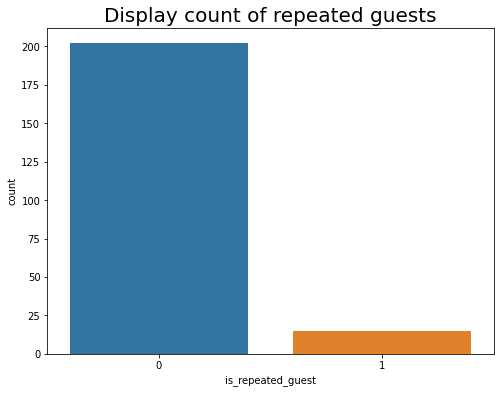

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Display count of repeated guests', fontsize = 20)
plt.show()